# Digits

In [1]:
import base

import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
# Outliers and corpus

outlier_digits = (2,)
corpus_digits = (6,)

In [3]:
from data import load_pendigits

corpus, outliers = load_pendigits.load(corpus_digits, outlier_digits)

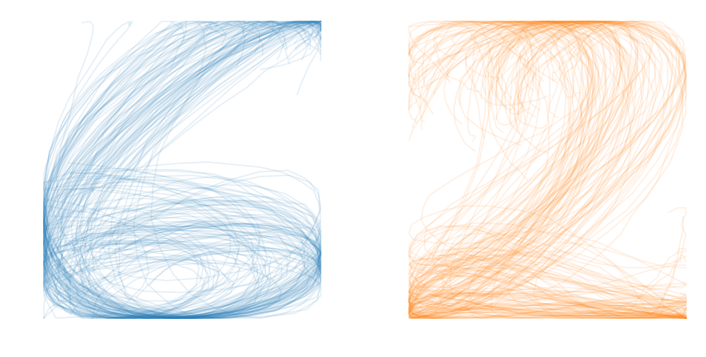

In [4]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.axis("off")
for path in corpus[:100]:
    plt.plot(*path.T, "C0", alpha=0.1)
    
plt.subplot(1, 2, 2)
for path in outliers[:100]:
    plt.plot(*path.T, "C1", alpha=0.1)
    
plt.axis("off")
plt.show()

## Compute variance of corpus and outliers

In [5]:
from sklearn.model_selection import train_test_split

corpus_train, corpus_test = train_test_split(corpus, test_size=300,
                                             random_state=0)

In [10]:
import variance

sig_order = 4

variance_corpus = variance.variance(corpus_test, corpus_train, sig_order)
variance_outliers = variance.variance(outliers, corpus_train, sig_order)

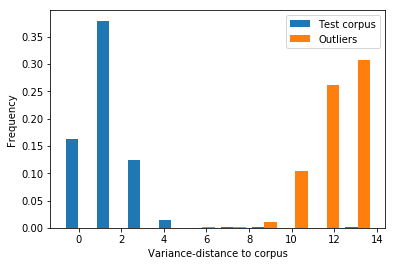

In [11]:
plt.hist([np.log(variance_corpus), np.log(variance_outliers)], density=True,
         label=["Test corpus", "Outliers"])
plt.legend()
plt.xlabel("Variance-distance to corpus")
plt.ylabel("Frequency")
plt.show()